Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Axel Schaffland, Ulf Krumnack

# Exercise Sheet 04: Clustering

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, May 23, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

In the following tasks we will be relying on numpy. Using the following import we expect it to be in global scope as `np`. Therefore we can, after executing the following cell, use stuff like `np.array` and `np.sqrt`. Check out the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/index.html) and especially search it using e.g. [Google Site Search](https://www.google.de/search?q=array+site%3Adocs.scipy.org%2Fdoc%2Fnumpy)! You can also try `np.lookfor('keyword search docstrings')` to get help.

In [1]:
import numpy as np
np.lookfor('get array diagonal')

# Try other queries here
### BEGIN SOLUTION
### END SOLUTION

Search results for 'get array diagonal'
---------------------------------------
numpy.fill_diagonal
    Fill the main diagonal of the given array of any dimensionality.
numpy.mask_indices
    Return the indices to access (n, n) arrays, given a masking function.
numpy.random.Generator.multivariate_normal
    Draw random samples from a multivariate normal distribution.
numpy.random.RandomState.multivariate_normal
    Draw random samples from a multivariate normal distribution.


## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

Mapping (i.e. multiplying with the matrix) an eigenvector will result a scaled version of that vector, i.e. it may change length and orientation, but not its direction in space. Formally, an eigenvector $v$ fulfills
$$A\cdot v=\lambda v\qquad\text{for some scalar $\lambda\in\mathbb{R}$}$$
The scalar $\lambda$ is called the eigenvalue belonging to the eigenvector $v$.

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

The characteristic polynomial of a $n\times n$-matrix $A$ is defined as
$$p_A(X) = \det(X\cdot\mathbf{I}_n-A)$$
where $\mathbf{I}_n$ is the identity matrix and $\det$ the determinant. It is a polynomial of degree $n$, that is invariant under matrix similarity. The roots of the characteristic polynomial are the eigenvalues of the matrix.
The algebraic multiplicity of an eigenvalue $\lambda$ is its multiplicity as a root of the characteristic polynomial.

For every eigenvalue, there may be multiple eigenvectors, that span a subspace called the eigenspace for that eigenvector. The geometric multiplicity of an eigenvalue is the dimension of the corresponding eigenspace. The geometric multiplicity cannot exceed the algebraic multiplicity.

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

The spectrum of a matrix is the set of its eigenvalues. The spectral theorem states under which conditions there is diagonalization and provides a cannonical decomposition, referred to es eigendecomposition. For example every real symmetric square matrix is diagonalizable. The diagonalization $A=VDV^T$ consists of a diagonal matrix having the eigenvalues in the diagonal and the matrix $V$ has the corresponding eigenvectors as columns.

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

# Clustering

## Assignment 1: Distance Measures for Clusters [5 Points]

### a) Point and cluster distances

Explain the difference of point and cluster distances and their relation to each other. Give examples.

Clusters are collections of points. The distance of two clusters can be derived from the distance of the points they contain. This requires that distances between points can be measured, i.e., the points are from some metric space. 

### b) Mean and centroid distance

* Describe how the cluster metrics *mean distance* and *centroid distance* work.
* What formal requirements do they have?
* What is their computational complexity? 
* Give a numerical example of clusters (with cluster size at least 2), where they lead to (a) the same result and (b) different results.

The $D_{\text{centroid}}$ first computes the center of each cluster and then computes the distance of these centers. Hence it can only be applied to clusters that allow to compute such a center (e.g. clusters of points in a euclidean space), while the $D_{\text{mean}}$ metric can be applied to clusters of points in a general metric space (where it is possible to measure the distance of datapoints, but not necessarily to obtain a cluster center).

### c) Implemention of  mean and centroid distance

Now implement the $d_{mean}$ and $d_{centroid}$ distance from the lecture. Each function expects two clusters each represented by a 2-dimensional numpy array, where the number of columns $n$ reflects the dimensionality of the data space and has to agree for both clusters, while the number of rows $mx$ and $my$ can vary from cluster to cluster. The return value is the respective distance.  Use the Euclidean distance as underlying metric.

Hint: you may consider using the function `scipy.spatial.distance.cdist`. Consult the documentation to find out how to use it.

In [2]:
from scipy.spatial.distance import cdist
import numpy as np

def d_mean(cluster1, cluster2):
    """
    Mean distance between points of two clusters.
   
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The mean distance between the points in the two clusters.
    """
    ### BEGIN SOLUTION
    return cdist(cluster1, cluster2).mean()
    ### END SOLUTION

x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21], [5,45,1], [1,12,7]])

assert np.round(d_mean(x, y), 3) == 22.297, "Result is not correct: {}".format(d_mean(x, y))
assert d_mean(x, y) == d_mean(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_mean(x, y), d_mean(y, x))

In [3]:
def d_centroid(cluster1, cluster2):
    """
    Calculate the distance between the centroids of two clusters.
    
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The distance between the centroids of two clusters.
    """
    ### BEGIN SOLUTION
    centroid1 = cluster1.mean(axis=0)
    centroid2 = cluster2.mean(axis=0)
    return np.linalg.norm(centroid1 - centroid2)
    ### END SOLUTION


x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21]])
z = np.array([[-2,0], [-1,100]])
w = np.array([[2,0], [1,100], [1,-100], [1,-20]])

assert np.round(d_centroid(x, y), 3) == 20.785, "Result is not correct: {}".format(d_centroid(x, y))
assert np.round(d_centroid(z, w), 3) == 55.069, "Result is not correct: {}".format(d_centroid(z, w))
assert d_centroid(x, y) == d_centroid(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_centroid(x, y), d_centroid(y, x)) 

 ## Assignment 2: Hierarchical Clustering [6 Points]
 
 Consider the following matrix of distances
 
|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |
 

### a) Perform agglomerative clustering

Do *agglomerative* average linkage clustering by hand (i.e. employing the *mean* cluster distance). Analyze how many alternatives you have to consider at each step.

Given a set $C$ with cardinality $|n|$ we start with $n$ singleton sets, our initiaial clusters, and then have $\tfrac12 n(n-1)$ options to join two of theses cluster to form a new one: in our example we could pair $a$ with any of the 4 other elements $b,c,d,e$, or $b$ with ony of the elements $c,d,e$, or $c$ with either $d$ or $e$, or $d$ with $e$, that is $\tfrac12\cdot5\cdot(5-1)=10$ possible pairs. 

A simple heuristic is to always merge clusters with the smallest inter-cluster distance (the most similar clusters) according to the cluster distance $d_{mean}$. In our case, in the first step this will be the clusters $\{a\}$ and $\{b\}$ with $d_{mean}(\{a\},\{b\})=2$ (as for singleton sets, the average distance is just the object distance, given in the matrix). 

To proceed further, we have to update our distance matrix to contain the new cluster:
 
|             |  $\{a,b\}$ |  $\{c\}$  |  $\{d\}$  |  $\{e\}$ |
|-------------|------------|-----------|-----------|----------|
| **{a,b}**   |  $0.0$     |  $5.5$    |  $9.5$    |  $8.5$   |
| **c**       |  $5.5$     |  $0.0$    |  $4.0$    |  $5.0$   |
| **d**       |  $9.5$     |  $4.0$    |  $0.0$    |  $3.0$   |
| **e**       |  $8.5$     |  $5.0$    |  $3.0$    |  $0      |

Now use this matrix to continue the process: the smallest distance is between $\{d\}$ and $\{e\}$, so these to clusters are merged to a new cluster $\{d,e\}$ and the cluster distance matrix has to be updated accordingly:

|               |  $\{a,b\}$ |  $\{c\}$  |  $\{d,e\}$  |
|---------------|------------|-----------|-------------|
| **{a,b}**     |  $0.0$     |  $5.5$    |  $9.0$      |
| **{c}**       |  $5.5$     |  $0.0$    |  $4.5$      |
| **{d,e}**     |  $9.0$     |  $4.5$    |  $0.0$      |

Now the smallest distance is between clusters $\{c\}$ and $\{d,e\}$, and joining these cluster and updating the distance matrix yields:

|             |  $\{a,b\}$   |  $\{c,d,e\}$  |
|-------------|--------------|---------------|
| **{a,b}**   |  $0.0$       |  $7.83$       |
| **{c,d,e}** |  $7.83$      |  $0.0$        |

So in total wie get the following dendrogram


                        {a,b,c,d,e}
                            | 7.83
               +------------+-------------+
               |                          |
               |                       {c,d,e}
               |                          | 4.5
               |                 +--------+---------+
               |                 |                  |
               |                 |                {d,e}
               |                 |                  | 3.0
             {a,b}               |             +----+----+
               | 2.0             |             |         |
        +------+------+          |             |         |
        |             |          |             |         |
       {a}           {b}        {c}           {d}       {e}

### b) Perform divisive clustering

Now try to do divisive average linkage clustering. Again, analyze how many splits are possible in the first step? Think of a strategy that allows to reduce this number and use this in your computation.

Having a set $C$ of cardinality $|C|=n$, there are in total $2^{n-1}-1$ possibilities to split it into two non-empty sets $A$ and $B$: each element of $C$ can either be assigned to $A$ or to $B$ giving $2^n$ possible ways of assigning elements of $C$ to $A$ and $B$. This number includes symmetric cases (e.g. "AABAB" is equivalent to "BBABA") and the empty set (that is "AAAAA"), so removing these leads to $\frac{2^n}{2}-1$. That is, in our case we would have to analyze $2^{5-1}-1=15$ splits.

This number grows exponentially large with the cardinality of $C$, making considering all possible splits not an options even for medium-sized sets $C$. Hence one has to apply some heuristics to find a good solution. There are of course several valid ideas here.

One such heuristic, based on ideas from Macnaughton-Smith et al (1964) is called DIANA (from DIvisive
ANAlysis) and it works as follows: First single out the single element to form a cluster of its own, such that the cluster distance to the other elements is maximized. Then elementwise grow this cluster. This will give the first split into two clusters $A$ and $B$. Then recursively apply this procedure to the resulting clusters.

In our example, this strategy works as follows: First we find one element $\{a,b,c,d,e\}$ such that the cluster distance (according to the $d_{mean}$ metric) to the remaining elements is maximized:
 
|  $S_1$  |  $C_1$        |  $d_{mean}(S_1,C_1)$                   |
|---------|---------------|----------------------------------------|
| $\{a\}$ | $\{b,c,d,e\}$ |  $(2  + 6 + 10 + 9)/4 = \mathbf{6.75}$ |
| $\{b\}$ | $\{a,c,d,e\}$ |  $(2  + 5 +  9 + 8)/4 = 6.00$          |
| $\{c\}$ | $\{a,b,d,e\}$ |  $(6  + 5 +  4 + 5)/4 = 5.00$          |
| $\{d\}$ | $\{a,b,c,e\}$ |  $(10 + 9 +  4 + 3)/4 = 6.50$          |
| $\{e\}$ | $\{a,b,c,e\}$ |  $(9  + 8 +  5 + 3)/4 = 6.24$          |

So the singleton $S_1=\{a\}$ has the largest distance to the other elements. Now repeat this, finding the next single element from $C_1$ that maximizes the distance to the remaining elements:

|  $S_2$  |  $C_2$      | $d_{mean}(S_2,C_2)$      | $d_{mean}(S_2,S_1)$ | $d_{mean}(S_2,C_2)-d_{mean}(S_2,S_1)$ | 
|---------|-------------|--------------------------|---------------------|-----------------------------|
| $\{b\}$ | $\{c,d,e\}$ | $(5+9+8)/3 \approx 7.33$ | $2.00$              | $\mathbf{5.33}$             |
| $\{c\}$ | $\{b,d,e\}$ | $(5+4+5)/3 \approx 4.67$ | $6.00$              | $-1.33$                     |
| $\{d\}$ | $\{b,c,e\}$ | $(9+4+3)/3 \approx 5.33$ | $10.00$             | $-4.67$                     |
| $\{e\}$ | $\{b,c,e\}$ | $(8+5+3)/3 \approx 5.33$ | $9.00$              | $-3.67$                     |

So element $b$ should be clustered together with element $a$. Now repeat this procedure for the remaining three element $\{c,d,e\}$:

|  $S_3$  |  $C_3$    | $d_{mean}(S_3,C_3)$ | $d_{mean}(S_3,S_2)$ | $d_{mean}(S_3,C_3)-d_{mean}(S_2,S_2)$ | 
|---------|-----------|---------------------|---------------------|---------------------------------------|
| $\{c\}$ | $\{d,e\}$ | $(4+5)/2 = 4.50$    | $(6+5)/2=5.50$      | $-1.00$                               |
| $\{d\}$ | $\{c,e\}$ | $(4+3)/2 = 3.50$    | $(10+9)/2=9.50$     | $-6.00$                               |
| $\{e\}$ | $\{c,e\}$ | $(5+3)/2 = 4.00$    | $(9+8)/2=8.50$      | $-4.5$                                |

Now all differences are negative, meaning that moving a further element from $\{c,d,e\}$ to $\{a,b\}$ will not give an improvement. Hence in the first split we split the set $C=\{a,b,c,d,e\}$ into the two clusters
$A=\{a,b\}$ and $B=\{c,d,e\}$. Now recursively apply this procedure to $A$ and $B$, starting with the cluster with the largest diameter (highest maximal distance between its objects). The diameter of $A$ is $2$ and for $B$ it is $5$. Applying the procedure to $B$ will result in the clusters $\{c\}$ and $\{d,e\}$, the diameter of $\{d,e\}$ being $3$. Hence one first splits the set into $\{d\}$ and $\{e\}$ and then $A$ into $\{a\}$ and $\{b\}$.


* Macnaughton-Smith, P., Williams, W. T., Dale, M. B. , and Mockett, L. G. (1964), *Dissimilarity analysis: A new technique of hierarchical sub-division*, Nature, 202, 1034-1035.

### c) Linkage criteria

In the following you find implementations for single- and complete-linkage clustering. Take a look at the code  and answer the question posted below. You may of course change parameters and try it out on different datasets (`points.txt` & `clusterData.txt` are provided).

Note that for performance reasons the code differs from the lecture's pseudocode (ML-05 Slide 8), but in general it does the same.

In [4]:
from scipy.spatial.distance import cdist

def linkage(data, k=5, complete=False):
    """
    Runs single or complete linkage clustering.
    
    Args:
        data (ndarray): Data points to be clustered in an array with shape (num_points, 2).
        k (int): Number of clusters.
        complete (bool): Whether to run complete linkage clustering.
        
    Returns:
        ndarray: The cluster labels for each data point. Shape is (num_points).
    """
    # Initially all points are their own cluster.
    labels = np.arange(len(data))

    # Calculate distance between all points.
    # Also removing half of the matrix because 
    # its symmetrical along the diagonal.
    dst = np.tril(cdist(data, data))

    while len(set(labels)) > k:
        # Get the lowest distance of two points which
        # do not have the same label.
        r, c = np.where(dst == np.min(dst[dst > 0]))
        
        # Ignore the case when there are multiple with
        # equally smallest distance.
        r = r[0]
        c = c[0]

        # The two points are now in the same cluster,
        # so they have a distance of 0 now.
        dst[r, c] = 0

        # Make the two clusters have the same label.
        labels[labels == labels[r]] = labels[c]

        # Check if we want to do complete linkage clustering.
        if complete:
            # Update the distances of the points which are not in the same cluster.
            for i in np.nonzero(dst[r, :] > 0)[0]:
                dst[r, i] = np.max(cdist(data[i, None], data[labels == labels[r], :]))

            # The distances to c are now the same as to r, so we can just
            # set them to zero - would be duplicates otherwise.
            dst[:, c] = 0

    return labels

[ 10  48  62 107 118]


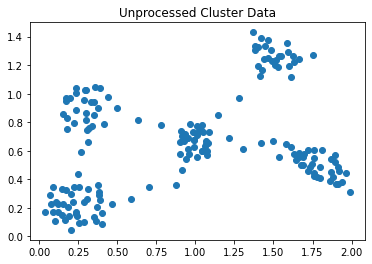

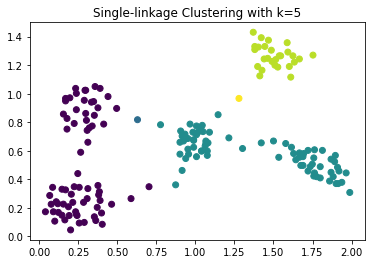

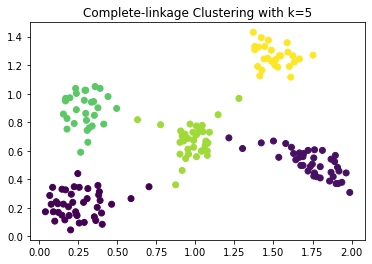

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Read the data.
data = np.loadtxt('points.txt')

# Show unprocessed data set.
fig_cluster = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('Unprocessed Cluster Data')
fig_cluster.canvas.draw()

# Apply Single Linkage Clustering
labels = linkage(data, k=5, complete=False)
fig_single = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Single-linkage Clustering with k=5')
fig_single.canvas.draw()

print(np.unique(labels))

# Apply Complete Linkage Clustering
labels = linkage(data, k=5, complete=True)
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Complete-linkage Clustering with k=5')
fig_complete.canvas.draw()

# Test different parameters above
### BEGIN SOLUTION
### END SOLUTION

What is the difference between single- and complete-linkage clustering and which is the better solution given the dataset?

Single-linkage tends to chain clusters along the data. That is why it combines the points in the center area with those in the bottom right corner.

Complete-linkage prefers compact clusters and thus combines each of the point heavy areas individually without merging them.

For this dataset, complete-linkage is superior.

## Assignment 3: k-means Clustering [9 Points]

### a) Implement k-means clustering. Plot the results for $k = 7$ and $k = 3$ in colorful scatter plots.

How could one handle situations when one or more clusters end up containing 0 elements?

In [6]:
def kmeans(data, k=3):
    """
    Applies kmeans clustering to the data using k initial clusters.
    data is expected to be a numpy array of size n*2, 
    n being the amount of observations in the data. This function returns
    the centroids and the labels for the clusters data (1,1,3,5,5,5,...)
    """
    ### BEGIN SOLUTION
    # Initial centroids are k random samples from the data.
    centroids = data[np.random.randint(0, data.shape[0], k)]
    old_centroids = np.zeros(centroids.shape)
    
    # Initial labels are all.. something.
    labels = np.ndarray(data.shape[0])
    
    # Lets keep count of our iterations to avoid infinite loops.
    iterations = 0
    
    while np.any(np.abs(centroids - old_centroids) > np.finfo(float).eps) and iterations < 1000:
        # Keep count of iterations and remember current centroids for change calculation.
        iterations += 1
        # Copy the centroids and keep them for break condition check.
        old_centroids = np.copy(centroids)
        
        # Calculate new labels. Labels are the index of their minimal distance to any centroid.
        labels = np.argmin(cdist(centroids, data), axis=0)
        
        # Update centroids using the new cluster labels.
        for label in range(k): 
            # Check for empty clusters.
            if np.any(labels == label):
                # Cluster is not empty, move its centroid to new mean.
                centroids[label, :] = np.mean(data[labels == label], axis=0)
            else:
                # Cluster is empty, set its centroid to the furthest outlier.
                blacksheep = np.argmax(cdist(centroids, data), axis=0)
                centroids[label, :] = data[blacksheep, :]
    
    ### END SOLUTION

    return labels, centroids

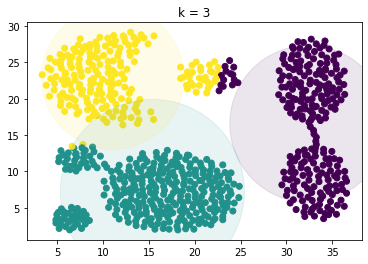

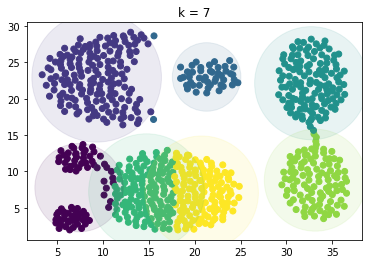

In [7]:
%matplotlib inline

data = np.loadtxt('clusterData.txt')


# Test different ks here
### BEGIN SOLUTION
### END SOLUTION
for k in [3,7]:
#for k in [7]*5:    
    labels, centroids = kmeans(data, k)

    kmeans_fig = plt.figure('k-means with k={}'.format(k))
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.scatter(centroids[:,0], centroids[:,1], 
                c=list(set(labels)), alpha=.1, marker='o',
                s=np.array([len(labels[labels==label]) for label in set(labels)])*100)
    plt.title('k = '+str(k))
    kmeans_fig.canvas.draw()

plt.show()
    
    

### b) Why might the clustering for k=7 not look optimal? 

K-Means works best for datasets in which clusters have the same circular shape and the same amount of datapoints per cluster. Opposed to a Mixture of Gaussians, in which the different distributions/clusters are weighted and the standard deviations may differ between distributions and also between different dimensions, in K-Means the variance is fixed and the same metric is used for all clusters. 

In this example inter- and intra cluster variance varies together with the number of datapoints per cluster.

Moreover, the outcome of K-Means is a local minima, depending on the random initialization of the cluster centers. This local minimal may not be the global optimum.